In [123]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta 
import pandas as pd
import calendar
import hydroeval as he

In [2]:
modis_path = '/uio/hume/student-u63/jacobqs/Master/code/MST-Himalaya/shyft_workspace_copy/shyft_workspace/shyft-data/netcdf/orchestration-testdata/MODIS/MODIS_snow_BG.nc'

In [10]:
regular_ptstk_10s_5c_daily_path = '/uio/hume/student-u63/jacobqs/Master/code/MST-Himalaya/shyft_workspace_copy/shyft_workspace/shyft-data/SIMULATIONS/regular_ptstk_10s_5c_daily_calibrated.nc'

In [105]:
modis_ds = xr.open_mfdataset(modis_path)
regular_ptstk_10s_5c_daily_ds = xr.open_mfdataset(regular_ptstk_10s_5c_daily_path)

In [130]:
modis_ds

<xarray.Dataset>
Dimensions:   (time: 3287)
Coordinates:
  * time      (time) datetime64[ns] 2000-10-01 2000-10-02 ... 2009-09-30
Data variables:
    FSCAmean  (time) float64 0.16 0.16 0.21 0.21 0.22 ... 0.12 0.12 0.13 0.12

In [106]:
regular_ptstk_10s_5c_daily_ds = regular_ptstk_10s_5c_daily_ds.sel(time = slice('2000-10-01', '2009-09-30'))

In [110]:
regular_ptstk_10s_5c_daily_ds_resampled = regular_ptstk_10s_5c_daily_ds.resample(time = '1D').mean()

In [126]:
regular_ptstk_10s_5c_daily_ds_resampled

<xarray.Dataset>
Dimensions:                     (time: 3287)
Coordinates:
  * time                        (time) datetime64[ns] 2000-10-01 ... 2009-09-30
Data variables:
    disch_sim                   (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    temperature                 (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    precipitation               (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    wind_speed                  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    radiation                   (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    relative_humidity           (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    snow_sca                    (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    snow_swe                    (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    glacier_melt                (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    outflow                     (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    actutal_evapotranspiration  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    priestley_taylor_response   (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/32)
    description:                             regular_ptstk_10s_5c_daily
    start_time:                              2000-01-01
    run_time_step:                           3600
    number_of_steps:                         87648
    nse:                                     0.9112528125336335
    elevation:                               4266.657036881314 m.a.s.l.
    ...                                      ...
    st_lwmax:                                0.4775295683893527
    shape:                                   2.0
    st_ts:                                   -2.495288912017344
    st_tx:                                   -2.5394425480405416
    msp_reservoir_direct_response_fraction:  1.0
    run_time_calib:                          166m 2.2s

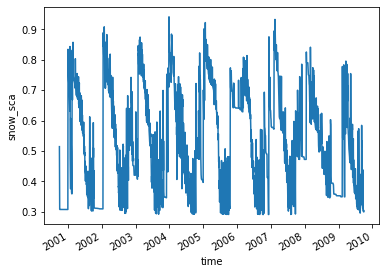

In [122]:
regular_ptstk_10s_5c_daily_ds_resampled.snow_sca.plot()

In [116]:
modis_ds = ds.sel(time = slice('2000-10-01', '2009-09-30'))

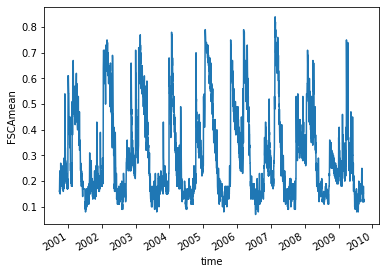

In [121]:
modis_ds.FSCAmean.plot()

In [118]:
FSCAmean = modis_ds.FSCAmean.values
snow_sca = regular_ptstk_10s_5c_daily_ds_resampled.snow_sca.values

In [127]:
nse = he.evaluator(he.nse, snow_sca, FSCAmean)
kge, r, alpha, beta = he.evaluator(he.kge, snow_sca, FSCAmean)

In [129]:
#print(nse)
print(kge)
print(r)
print(alpha)
print(beta)

[0.21722648]
[0.77117409]
[0.94908185]
[1.74684699]


In [125]:
nse

array([-1.16013761])

In [60]:
# pd.to_datetime(modis_ds.t.values.astype('int') - 719529, unit = 'D')

DatetimeIndex(['2000-10-01', '2000-10-02', '2000-10-03', '2000-10-04',
               '2000-10-05', '2000-10-06', '2000-10-07', '2000-10-08',
               '2000-10-09', '2000-10-10',
               ...
               '2015-09-21', '2015-09-22', '2015-09-23', '2015-09-24',
               '2015-09-25', '2015-09-26', '2015-09-27', '2015-09-28',
               '2015-09-29', '2015-09-30'],
              dtype='datetime64[ns]', length=5478, freq=None)

In [73]:
# modis_time = modis_ds.t.values.astype('int')
# start_time = int(datetime(2000,1,1,0,0,0).strftime('%s'))
# epoch_time = int(datetime(1970,1,1,0,0,0).strftime('%s'))
# start_time

In [61]:
def datenum_to_datetime(datenum):
    days = datenum % 1
    hours = days % 1 * 24
    minutes = hours %1 * 60
    seconds = minutes % 1 * 60
    return datetime.fromordinal(int(datenum)) \
        + timedelta(days = int(days)) \
        + timedelta(hours = int(hours)) \
        + timedelta(minutes = int(minutes)) \
        + timedelta(seconds= round(seconds)) \
        - timedelta(days = 366)

In [62]:
t_list = []
for t in modis_time:
    point = datenum_to_datetime(t)
    t_list.append(point)

In [70]:
ds = xr.Dataset(
    data_vars = dict(
        FSCAmean = (['time'], modis_ds.FSCAmean.values * 0.01)),
    coords= dict(
        time = (['time'], t_list)
    )
)

In [115]:
ds

<xarray.Dataset>
Dimensions:   (time: 5478)
Coordinates:
  * time      (time) datetime64[ns] 2000-10-01 2000-10-02 ... 2015-09-30
Data variables:
    FSCAmean  (time) float64 0.16 0.16 0.21 0.21 0.22 ... 0.14 0.1 0.13 0.16

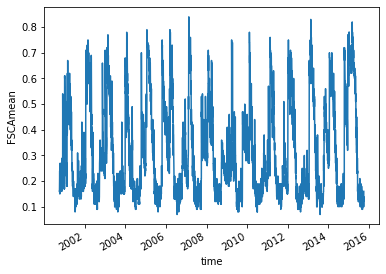

In [72]:
ds.FSCAmean.plot()

In [49]:
epoch_1970_diff = start_time - epoch_time

In [54]:
timestamps = pd.to_datetime(t + epoch_1970_diff, unit = 'D')

OutOfBoundsDatetime: cannot convert input with unit 'D'

In [55]:
timestamps

DatetimeIndex(['2000-01-09 10:59:20', '2000-01-09 10:59:21',
               '2000-01-09 10:59:22', '2000-01-09 10:59:23',
               '2000-01-09 10:59:24', '2000-01-09 10:59:25',
               '2000-01-09 10:59:26', '2000-01-09 10:59:27',
               '2000-01-09 10:59:28', '2000-01-09 10:59:29',
               ...
               '2000-01-09 12:30:28', '2000-01-09 12:30:29',
               '2000-01-09 12:30:30', '2000-01-09 12:30:31',
               '2000-01-09 12:30:32', '2000-01-09 12:30:33',
               '2000-01-09 12:30:34', '2000-01-09 12:30:35',
               '2000-01-09 12:30:36', '2000-01-09 12:30:37'],
              dtype='datetime64[ns]', length=5478, freq=None)

In [28]:
python_datetime = datetime.fromordinal(int(t))

TypeError: only size-1 arrays can be converted to Python scalars

In [20]:
# Converting timestamps, t, to datetime64
dates = []
start_date = datetime.datetime(2000,1,1,0,0,0)
sec_since_epoch = datetime.datetime.timestamp(start_date)
delta_seconds = modis_ds.t.values * 60 * 60

for i in delta_seconds:
    time = sec_since_epoch + i
    time = np.datetime64(datetime.datetime.fromtimestamp(time))
    dates.append(time)

In [21]:
dates

[numpy.datetime64('2083-05-13T09:00:00.000000'),
 numpy.datetime64('2083-05-13T10:00:00.000000'),
 numpy.datetime64('2083-05-13T11:00:00.000000'),
 numpy.datetime64('2083-05-13T12:00:00.000000'),
 numpy.datetime64('2083-05-13T13:00:00.000000'),
 numpy.datetime64('2083-05-13T14:00:00.000000'),
 numpy.datetime64('2083-05-13T15:00:00.000000'),
 numpy.datetime64('2083-05-13T16:00:00.000000'),
 numpy.datetime64('2083-05-13T17:00:00.000000'),
 numpy.datetime64('2083-05-13T18:00:00.000000'),
 numpy.datetime64('2083-05-13T19:00:00.000000'),
 numpy.datetime64('2083-05-13T20:00:00.000000'),
 numpy.datetime64('2083-05-13T21:00:00.000000'),
 numpy.datetime64('2083-05-13T22:00:00.000000'),
 numpy.datetime64('2083-05-13T23:00:00.000000'),
 numpy.datetime64('2083-05-14T00:00:00.000000'),
 numpy.datetime64('2083-05-14T01:00:00.000000'),
 numpy.datetime64('2083-05-14T02:00:00.000000'),
 numpy.datetime64('2083-05-14T03:00:00.000000'),
 numpy.datetime64('2083-05-14T04:00:00.000000'),
 numpy.datetime64('2

In [12]:
regular_ptstk_10s_5c_daily_ds

<xarray.Dataset>
Dimensions:                     (time: 87648)
Coordinates:
  * time                        (time) datetime64[ns] 2000-01-01 ... 2009-12-...
Data variables:
    disch_sim                   (time) float64 dask.array<chunksize=(87648,), meta=np.ndarray>
    temperature                 (time) float64 dask.array<chunksize=(87648,), meta=np.ndarray>
    precipitation               (time) float64 dask.array<chunksize=(87648,), meta=np.ndarray>
    wind_speed                  (time) float64 dask.array<chunksize=(87648,), meta=np.ndarray>
    radiation                   (time) float64 dask.array<chunksize=(87648,), meta=np.ndarray>
    relative_humidity           (time) float64 dask.array<chunksize=(87648,), meta=np.ndarray>
    snow_sca                    (time) float64 dask.array<chunksize=(87648,), meta=np.ndarray>
    snow_swe                    (time) float64 dask.array<chunksize=(87648,), meta=np.ndarray>
    glacier_melt                (time) float64 dask.array<chunksize=(87648,), meta=np.ndarray>
    outflow                     (time) float64 dask.array<chunksize=(87648,), meta=np.ndarray>
    actutal_evapotranspiration  (time) float64 dask.array<chunksize=(87648,), meta=np.ndarray>
    priestley_taylor_response   (time) float64 dask.array<chunksize=(87648,), meta=np.ndarray>
Attributes: (12/32)
    description:                             regular_ptstk_10s_5c_daily
    start_time:                              2000-01-01
    run_time_step:                           3600
    number_of_steps:                         87648
    nse:                                     0.9112528125336335
    elevation:                               4266.657036881314 m.a.s.l.
    ...                                      ...
    st_lwmax:                                0.4775295683893527
    shape:                                   2.0
    st_ts:                                   -2.495288912017344
    st_tx:                                   -2.5394425480405416
    msp_reservoir_direct_response_fraction:  1.0
    run_time_calib:                          166m 2.2s

In [8]:
ds.FSCAmean.values

array([16, 16, 21, ..., 10, 13, 16], dtype=uint8)